In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import utils

Res_B     = utils.RetrievalResults(prefix='../retrieval_outputs/no_bands_K_B_ret_7/test_')
d_spec_B  = Res_B._load_object('d_spec', bestfit_prefix=False)
LogLike_B = Res_B._load_object('LogLike', bestfit_prefix=True)
p_wave, p_flux, p_flux_B = Res_B.get_example_line_profile()

  analysing data from ../retrieval_outputs/no_bands_K_B_ret_7/test_.txt


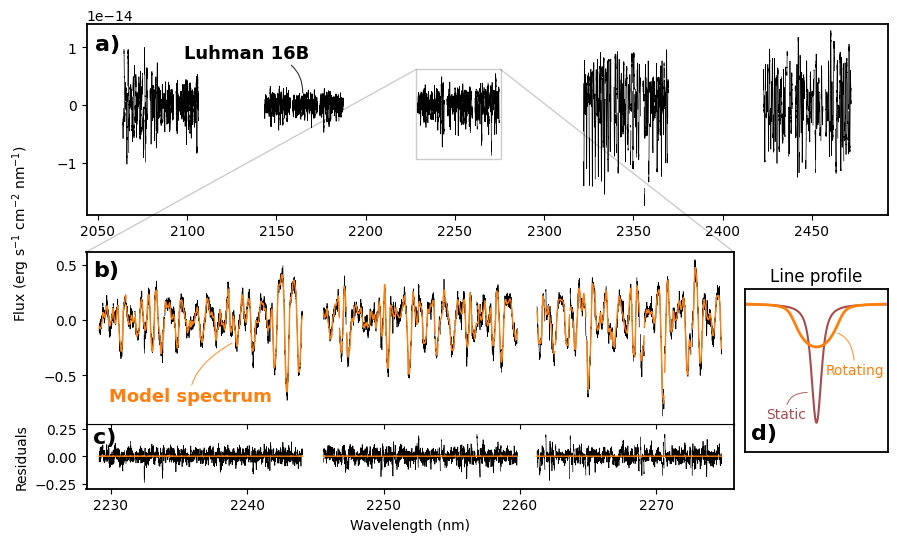

In [6]:
sep_1 = 0.08
sep_2 = 0.08
#offset_2 = 0.02

fig = plt.figure(figsize=(9,6*0.9))
gs = fig.add_gridspec(
    #nrows=4, ncols=1, hspace=0, wspace=0.02, height_ratios=[0.42,0.06,0.42,0.1]
    nrows=6, ncols=2, hspace=0, wspace=0.03, 
    height_ratios=[0.41, sep_1, sep_2,0.37-sep_2, 0.14-sep_2,sep_2], 
    width_ratios=[0.82,0.18]
    )
ax = np.array([
    fig.add_subplot(gs[0,:]), 
    fig.add_subplot(gs[2:4,0]), 
    fig.add_subplot(gs[-2:,0]), 

    fig.add_subplot(gs[3:5,1]), 
    ])

scale = 1e14

for i in range(d_spec_B.n_orders):

    for j in range(d_spec_B.n_dets):
        ax[0].plot(d_spec_B.wave[i,j], d_spec_B.flux[i,j], c='k', lw=0.5)

        if i == 2:
            ax[1].plot(d_spec_B.wave[i,j], scale*(d_spec_B.flux[i,j]), c='k', lw=0.5)
            ax[1].plot(d_spec_B.wave[i,j], scale*(LogLike_B.m_flux_phi[i,j]), c='C1', lw=1)        

            ax[2].plot(d_spec_B.wave[i,j], scale*(d_spec_B.flux[i,j]-LogLike_B.m_flux_phi[i,j]), c='k', lw=0.5)
            ax[2].plot(d_spec_B.wave[i,j], scale*(LogLike_B.m_flux_phi[i,j]-LogLike_B.m_flux_phi[i,j]), c='C1', lw=1)

            ax[1].set(xlim=(d_spec_B.wave[i,:].min()-0.7, d_spec_B.wave[i,:].max()+0.7))
            ax[2].set(xlim=ax[1].get_xlim())

#ax[0].set(ylabel='High-pass filtered flux '+r'$\mathrm{(erg\ s^{-1}\ cm^{-2}\ nm^{-1})}$')
#ax[1].set(ylim=ax[0].get_ylim)
ax[0].set(ylim=(-1.9e-14,1.4e-14))
ax[1].set(xticklabels=[])
ax[2].set(xlabel=r'Wavelength (nm)', ylabel='Residuals')

x0 = ax[1].get_xlim()[0]
y0 = ax[1].get_ylim()[0]/scale
width  = np.abs(ax[1].get_xlim()[1] - x0)
height = np.abs(ax[1].get_ylim()[1]/scale - y0)
bounds = (x0, y0, width, height)

_, con_patch = ax[0].indicate_inset(
    bounds=bounds, inset_ax=ax[1], edgecolor='k', alpha=0.2, 
    )

height_ratio = ax[2].get_position().bounds[-1] / ax[1].get_position().bounds[-1]
#height_ratio = gs.get_height_ratios()[3] / gs.get_height_ratios()[2]
ax[2].set_ylim(-0.5*height_ratio*height*scale, +0.5*height_ratio*height*scale)
#print(np.diff(ax[2].get_ylim())/np.diff(ax[1].get_ylim()), 0.1/0.42)

spine_lw = 1.3
ax[0].spines[['left','right','top','bottom']].set_linewidth(spine_lw)
ax[1].spines[['left','right','top']].set_linewidth(spine_lw)
ax[2].spines[['left','right','bottom']].set_linewidth(spine_lw)
ax[2].set_zorder(-2)

plt.subplots_adjust(left=0.09, bottom=0.09, top=0.95, right=0.98)

l0, b0, w0, h0 = ax[0].get_position().bounds
l1, b1, w1, h1 = ax[1].get_position().bounds

x0 = l0 - 0.061
y0 = np.mean([b1+h1, b0])

fig.text(
    x0, y0, 'Flux '+r'$\mathrm{(erg\ s^{-1}\ cm^{-2}\ nm^{-1})}$', 
    rotation=90, ha='right', va='center', 
    )

#'''
ax[-1].plot(p_wave-p_wave.mean(), p_flux, c='maroon', lw=1.5, alpha=0.7)
ax[-1].annotate(
    'Static', xy=(-0.07,0.4), xytext=(-0.23,0.3), ha='center', va='top', c='maroon', alpha=0.7,
    arrowprops={
        'arrowstyle':'-', 'connectionstyle':'angle3,angleA=90,angleB=0', 
        'shrinkA':0, 'shrinkB':0, #'arrowstyle':']-',
        'lw':0.8, 'color':'maroon', 'alpha':0.7*0.8, 
        }, 
    )

ax[-1].plot(p_wave-p_wave.mean(), p_flux_B, c='C1', lw=2, alpha=1)
ax[-1].annotate(
    'Rotating', xy=(0.16,0.8), xytext=(0.285,0.6), ha='center', va='top', c='C1', 
    arrowprops={
        'arrowstyle':'-', 'connectionstyle':'angle3,angleA=90,angleB=-20', 
        'shrinkA':0, 'shrinkB':0, #'arrowstyle':']-',
        'lw':0.8, 'color':'C1', 'alpha':0.8, 
        }, 
    )

ax[-1].set(
    title='Line profile', xlim=(-0.53,0.53), xticks=[], 
    yticks=[], ylim=(0,1.1),#yticks=[0.,0.5,1.], yticklabels=['0','','1']
    )
ax[-1].spines[['left','right','top','bottom']].set_linewidth(spine_lw)
ax[-1].tick_params(left=False, labelleft=False, right=True, labelright=True)
#'''

font_kwargs = dict(fontsize=16, fontweight='bold')
ax[0].annotate('a)', xy=(0.01,0.95), xycoords='axes fraction', ha='left', va='top', **font_kwargs)
ax[1].annotate('b)', xy=(0.01,0.95), xycoords='axes fraction', ha='left', va='top', **font_kwargs)
ax[2].annotate('c)', xy=(0.01,0.95), xycoords='axes fraction', ha='left', va='top', **font_kwargs)
ax[3].annotate('d)', xy=(0.04,0.05), xycoords='axes fraction', ha='left', va='bottom', **font_kwargs)

ax[0].annotate(
    'Luhman 16B', xy=(0.27,0.64), xytext=(0.2,0.8), xycoords='axes fraction', 
    ha='center', va='bottom', c='k', fontsize=13, fontweight='bold', 
    arrowprops={
        'arrowstyle':'-', 'connectionstyle':'angle3,angleA=0,angleB=90', 
        'shrinkA':0, 'shrinkB':0, 'lw':0.8, 'color':'k', 'alpha':0.8, 
        }, 
    )
ax[1].annotate(
    'Model spectrum', xy=(0.225,0.47), xytext=(0.16,0.21), xycoords='axes fraction', 
    ha='center', va='top', c='C1', fontsize=13, fontweight='bold', 
    arrowprops={
        'arrowstyle':'-', 'connectionstyle':'angle3,angleA=90,angleB=30', 
        'shrinkA':0, 'shrinkB':0, 'lw':0.8, 'color':'C1', 'alpha':0.8, 
        }, 
    )

plt.savefig('./plots/spectrum_B.pdf')
plt.show()

In [3]:
Res_A     = utils.RetrievalResults(prefix='../retrieval_outputs/no_bands_K_A_ret_2/test_')
d_spec_A  = Res_A._load_object('d_spec', bestfit_prefix=False)
LogLike_A = Res_A._load_object('LogLike', bestfit_prefix=True)
p_wave, p_flux, p_flux_A = Res_A.get_example_line_profile()

  analysing data from ../retrieval_outputs/no_bands_K_A_ret_2/test_.txt


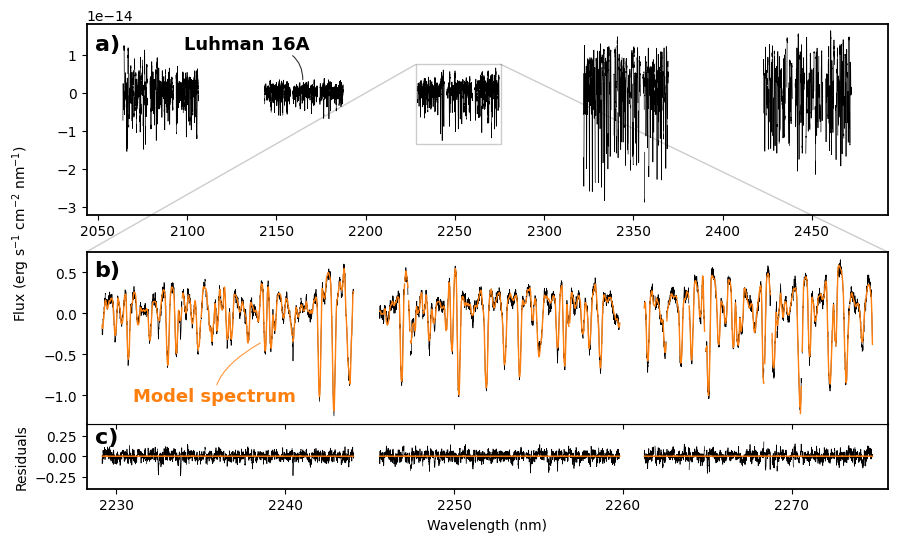

In [19]:
sep_1 = 0.08
sep_2 = 0.08
#offset_2 = 0.02

fig = plt.figure(figsize=(9,6*0.9))
gs = fig.add_gridspec(
    #nrows=4, ncols=1, hspace=0, wspace=0.02, height_ratios=[0.42,0.06,0.42,0.1]
    nrows=6, ncols=2, hspace=0, wspace=0.03, 
    height_ratios=[0.41, sep_1, sep_2,0.37-sep_2, 0.14-sep_2,sep_2], 
    width_ratios=[0.82,0.18]
    )
ax = np.array([
    fig.add_subplot(gs[0,:]), 
    fig.add_subplot(gs[2:4,:]), fig.add_subplot(gs[-2:,:]), 
    #fig.add_subplot(gs[2:4,0]), fig.add_subplot(gs[-2:,0]), fig.add_subplot(gs[3:5,1]), 
    ])

scale = 1e14

for i in range(d_spec_A.n_orders):

    for j in range(d_spec_A.n_dets):
        ax[0].plot(d_spec_A.wave[i,j], d_spec_A.flux[i,j], c='k', lw=0.5)

        if i == 2:
            ax[1].plot(d_spec_A.wave[i,j], scale*(d_spec_A.flux[i,j]), c='k', lw=0.5)
            ax[1].plot(d_spec_A.wave[i,j], scale*(LogLike_A.m_flux_phi[i,j]), c='C1', lw=1)
            #ax[1].plot(d_spec_B.wave[i,j], scale*(LogLike_B.m_flux_phi[i,j]-0.5e-14), c='C4', lw=1, alpha=0.8)

            ax[2].plot(d_spec_A.wave[i,j], scale*(d_spec_A.flux[i,j]-LogLike_A.m_flux_phi[i,j]), c='k', lw=0.5)
            ax[2].plot(d_spec_A.wave[i,j], scale*(LogLike_A.m_flux_phi[i,j]-LogLike_A.m_flux_phi[i,j]), c='C1', lw=1)
            #ax[2].plot(d_spec_A.wave[i,j], scale*(LogLike_A.m_flux_phi[i,j]-LogLike_B.m_flux_phi[i,j]), c='C4', lw=1)

            ax[1].set(xlim=(d_spec_A.wave[i,:].min()-0.7, d_spec_A.wave[i,:].max()+0.7))
            ax[2].set(xlim=ax[1].get_xlim())

#ax[0].set(ylabel='High-pass filtered flux '+r'$\mathrm{(erg\ s^{-1}\ cm^{-2}\ nm^{-1})}$')
#ax[1].set(ylim=ax[0].get_ylim)
ax[0].set(ylim=(-3.2e-14,1.8e-14))
ax[1].set(xticklabels=[])
ax[2].set(xlabel=r'Wavelength (nm)', ylabel='Residuals')

x0 = ax[1].get_xlim()[0]
y0 = ax[1].get_ylim()[0]/scale
width  = np.abs(ax[1].get_xlim()[1] - x0)
height = np.abs(ax[1].get_ylim()[1]/scale - y0)
bounds = (x0, y0, width, height)

_, con_patch = ax[0].indicate_inset(
    bounds=bounds, inset_ax=ax[1], edgecolor='k', alpha=0.2, 
    )

height_ratio = ax[2].get_position().bounds[-1] / ax[1].get_position().bounds[-1]
#height_ratio = gs.get_height_ratios()[3] / gs.get_height_ratios()[2]
ax[2].set_ylim(-0.5*height_ratio*height*scale, +0.5*height_ratio*height*scale)
#print(np.diff(ax[2].get_ylim())/np.diff(ax[1].get_ylim()), 0.1/0.42)

spine_lw = 1.3
ax[0].spines[['left','right','top','bottom']].set_linewidth(spine_lw)
ax[1].spines[['left','right','top']].set_linewidth(spine_lw)
ax[2].spines[['left','right','bottom']].set_linewidth(spine_lw)
ax[2].set_zorder(-2)

plt.subplots_adjust(left=0.09, bottom=0.09, top=0.95, right=0.98)

l0, b0, w0, h0 = ax[0].get_position().bounds
l1, b1, w1, h1 = ax[1].get_position().bounds

x0 = l0 - 0.061
y0 = np.mean([b1+h1, b0])

fig.text(
    x0, y0, 'Flux '+r'$\mathrm{(erg\ s^{-1}\ cm^{-2}\ nm^{-1})}$', 
    rotation=90, ha='right', va='center', 
    )

'''
ax[-1].plot(p_wave-p_wave.mean(), p_flux, c='maroon', lw=1.5, alpha=0.7)
ax[-1].annotate(
    'Static', xy=(-0.07,0.4), xytext=(-0.23,0.3), ha='center', va='top', c='maroon', alpha=0.7,
    arrowprops={
        'arrowstyle':'-', 'connectionstyle':'angle3,angleA=90,angleB=0', 
        'shrinkA':0, 'shrinkB':0, #'arrowstyle':']-',
        'lw':0.8, 'color':'maroon', 'alpha':0.7*0.8, 
        }, 
    )

#ax[-1].plot(p_wave-p_wave_cen, p_flux_eq_band, c='C1', lw=2, alpha=1)
ax[-1].plot(p_wave-p_wave.mean(), p_flux_A, c='C1', lw=2, alpha=1)
ax[-1].annotate(
    'Rotating', xy=(0.16,0.8), xytext=(0.285,0.6), ha='center', va='top', c='C1', 
    arrowprops={
        'arrowstyle':'-', 'connectionstyle':'angle3,angleA=90,angleB=-20', 
        'shrinkA':0, 'shrinkB':0, #'arrowstyle':']-',
        'lw':0.8, 'color':'C1', 'alpha':0.8, 
        }, 
    )

#ax[-1].annotate('Rotation', xy=(0.08,0.65))
ax[-1].set(
    title='Line profile', xlim=(-0.53,0.53), xticks=[], 
    yticks=[], ylim=(0,1.1),#yticks=[0.,0.5,1.], yticklabels=['0','','1']
    )
ax[-1].spines[['left','right','top','bottom']].set_linewidth(spine_lw)
ax[-1].tick_params(left=False, labelleft=False, right=True, labelright=True)
#'''

font_kwargs = dict(fontsize=16, fontweight='bold')
ax[0].annotate('a)', xy=(0.01,0.95), xycoords='axes fraction', ha='left', va='top', **font_kwargs)
ax[1].annotate('b)', xy=(0.01,0.95), xycoords='axes fraction', ha='left', va='top', **font_kwargs)
ax[2].annotate('c)', xy=(0.01,0.95), xycoords='axes fraction', ha='left', va='top', **font_kwargs)
#ax[3].annotate('d)', xy=(0.04,0.05), xycoords='axes fraction', ha='left', va='bottom', **font_kwargs)

ax[0].annotate(
    'Luhman 16A', xy=(0.27,0.71), xytext=(0.2,0.85), xycoords='axes fraction', 
    ha='center', va='bottom', c='k', fontsize=13, fontweight='bold', 
    arrowprops={
        'arrowstyle':'-', 'connectionstyle':'angle3,angleA=0,angleB=90', 
        'shrinkA':0, 'shrinkB':0, 'lw':0.8, 'color':'k', 'alpha':0.8, 
        }, 
    )
ax[1].annotate(
    'Model spectrum', xy=(0.217,0.47), xytext=(0.16,0.21), xycoords='axes fraction', 
    ha='center', va='top', c='C1', fontsize=13, fontweight='bold', 
    arrowprops={
        'arrowstyle':'-', 'connectionstyle':'angle3,angleA=90,angleB=30', 
        'shrinkA':0, 'shrinkB':0, 'lw':0.8, 'color':'C1', 'alpha':0.8, 
        }, 
    )

plt.savefig('./plots/spectrum_A.pdf')
plt.show()